In [0]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [3]:
! unzip DADOS.zip

unzip:  cannot find or open DADOS.zip, DADOS.zip.zip or DADOS.zip.ZIP.


# Dados 2013

In [0]:
import pandas as pd
data = pd.read_csv("MICRODADOS_ENEM_2013.csv", delimiter=';', encoding='latin-1', nrows=250000)
#with open("MICRODADOS_ENEM_2013.csv", encoding='latin-1') as myfile:
 #   data=myfile.readlines()[0:100000]

In [143]:
data.head()

,NU_INSCRICAO,NU_ANO,COD_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,COD_UF_RESIDENCIA,UF_RESIDENCIA,IN_ESTUDA_CLASSE_HOSPITALAR,COD_ESCOLA,COD_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,...,Q067,Q068,Q069,Q070,Q071,Q072,Q073,Q074,Q075,Q076
0,130005702868,2013,4314902,PORTO ALEGRE,43,RS,0,NaN,NaN,NaN,...,B,B,B,B,A,B,B,B,B,C
1,130005702869,2013,1501402,BELEM,15,PA,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130005702870,2013,2902500,BAIANOPOLIS,29,BA,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130005702871,2013,3544004,RIO DAS PEDRAS,35,SP,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130005702872,2013,2402006,CAICO,24,RN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
! pip install folium geocoder

    100% |████████████████████████████████| 102kB 6.1MB/s 
    100% |████████████████████████████████| 81kB 22.2MB/s 


In [0]:
from tqdm import tqdm
import pandas as pd
import folium
from folium.plugins import HeatMap
import branca
from folium import plugins
import geocoder

In [145]:
for i in data.columns:
  print(i)

NU_INSCRICAO
NU_ANO
COD_MUNICIPIO_RESIDENCIA
NO_MUNICIPIO_RESIDENCIA
COD_UF_RESIDENCIA
UF_RESIDENCIA
IN_ESTUDA_CLASSE_HOSPITALAR
COD_ESCOLA
COD_MUNICIPIO_ESC
NO_MUNICIPIO_ESC
COD_UF_ESC
UF_ESC
ID_DEPENDENCIA_ADM_ESC
ID_LOCALIZACAO_ESC
SIT_FUNC_ESC
IDADE
TP_SEXO
NACIONALIDADE
COD_MUNICIPIO_NASCIMENTO
NO_MUNICIPIO_NASCIMENTO
COD_UF_NASCIMENTO
UF_NASCIMENTO
ST_CONCLUSAO
ANO_CONCLUIU
TP_ESCOLA
IN_TP_ENSINO
TP_ESTADO_CIVIL
TP_COR_RACA
IN_BAIXA_VISAO
IN_CEGUEIRA
IN_SURDEZ
IN_DEFICIENCIA_AUDITIVA
IN_SURDO_CEGUEIRA
IN_DEFICIENCIA_FISICA
IN_DEFICIENCIA_MENTAL
IN_DEFICIT_ATENCAO
IN_DISLEXIA
IN_GESTANTE
IN_LACTANTE
IN_IDOSO
IN_AUTISMO
IN_SABATISTA
IN_BRAILLE
IN_AMPLIADA_24
IN_AMPLIADA_18
IN_LEDOR
IN_ACESSO
IN_TRANSCRICAO
IN_LIBRAS
IN_LEITURA_LABIAL
IN_MESA_CADEIRA_RODAS
IN_MESA_CADEIRA_SEPARADA
IN_APOIO_PERNA
IN_GUIA_INTERPRETE
IN_CERTIFICADO
NO_ENTIDADE_CERTIFICACAO
COD_UF_ENTIDADE_CERTIFICACAO
UF_ENTIDADE_CERTIFICACAO
COD_MUNICIPIO_PROVA
NO_MUNICIPIO_PROVA
COD_UF_PROVA
UF_PROVA
IN_PRESENCA_CN
I

# Brasil

In [0]:
defi = data[(data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1)]

In [147]:
#13% das pessoas em 2013 manifestaram necessidade de auxílio por deficiência ou dificuldade de locomoção. 
per_aux = len(defi)/len(data)*100
per_aux

13.2548

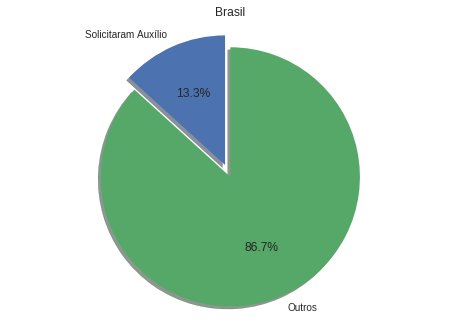

In [196]:
import matplotlib.pyplot as plt


labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_aux, 100 - per_aux]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Brasil")

plt.show()

## RN

In [148]:
#Total de participantes
rn = data[data['UF_PROVA'] == 'RN']
len(rn)

6451

In [0]:
defi_rn = data[(data['UF_PROVA'] == 'RN') & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [150]:
#Porcentagem de participantes que solicitaram auxílio no RN
per_rn = len(defi_rn)/len(rn)*100
per_rn

9.083862966981863

# PB

In [151]:
pb = data[data['UF_PROVA'] == 'PB']
len(pb)

6768

In [0]:
defi_pb = data[(data['UF_PROVA'] == 'PB') & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [153]:
per_pb = len(defi_pb)/len(pb)*100
per_pb

7.934397163120567

# PE

In [154]:
pe = data[data['UF_PROVA'] == 'PE']
len(pe)

12419

In [0]:
defi_pe = data[(data['UF_PROVA'] == 'PE') & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [156]:
per_pe = len(defi_pe)/len(pe)*100
per_pe

7.899186730010468

# BA

In [157]:
ba = data[data['UF_PROVA'] == 'BA']
len(ba)

16133

In [0]:
defi_ba = data[(data['UF_PROVA'] == 'BA') & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [159]:
per_ba = len(defi_ba)/len(ba)*100
per_ba

13.140767371226678

# MA

In [160]:
ma = data[data['UF_PROVA'] == 'MA']
len(ma)

8174

In [0]:
defi_ma = data[(data['UF_PROVA'] == 'MA') & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [162]:
per_ma = len(defi_ma)/len(ma)*100
per_ma

8.478101296794716

# CE

In [163]:
ce = data[data['UF_PROVA'] == 'CE']
len(ce)

18734

In [0]:
defi_ce = data[(data['UF_PROVA'] == 'CE') & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [165]:
per_ce = len(defi_ce)/len(ce)*100
per_ce

14.42297427137824

# AL

In [166]:
al = data[data['UF_PROVA'] == 'AL']
len(al)

4555

In [0]:
defi_al = data[(data['UF_PROVA'] == 'AL') & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [168]:
per_al = len(defi_al)/len(al)*100
per_al

12.381997804610318

# SE

In [169]:
se = data[data['UF_PROVA'] == 'SE']
len(se)

3350

In [0]:
defi_se = data[(data['UF_PROVA'] == 'SE') & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [171]:
per_se = len(defi_se)/len(se)*100
per_se

11.582089552238806

# PI

In [172]:
pi = data[data['UF_PROVA'] == 'PI']
len(pi)

5377

In [0]:
defi_pi = data[(data['UF_PROVA'] == 'PI') & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [174]:
per_pi = len(defi_pi)/len(pi)*100
per_pi

11.67937511623582

# Graficos Pizza

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

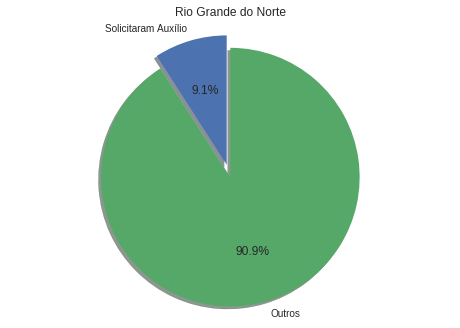

In [176]:
labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_rn, 100 - per_rn]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Rio Grande do Norte")

plt.show()

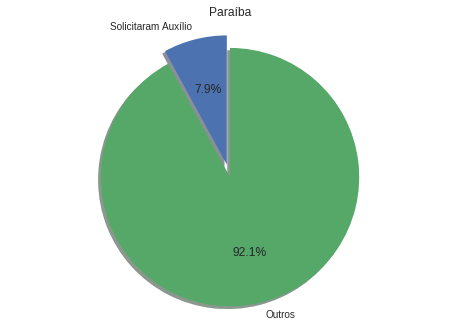

In [177]:
labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_pb, 100 - per_pb]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Paraíba")

plt.show()

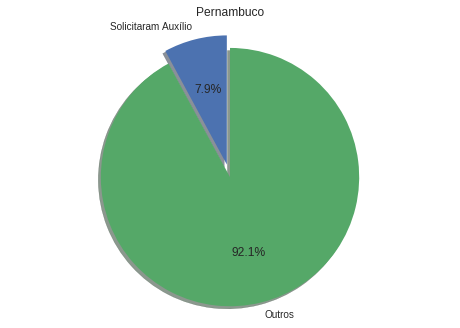

In [179]:

labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_pe, 100 - per_pe]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title("Pernambuco")

plt.show()

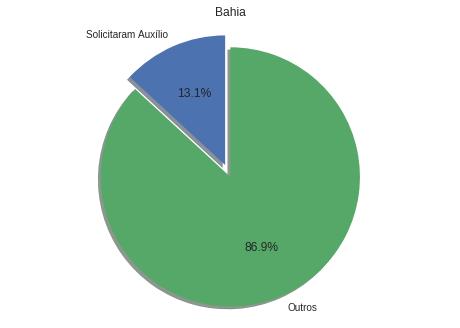

In [180]:

labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_ba, 100 - per_ba]
explode = (0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Bahia")

plt.show()

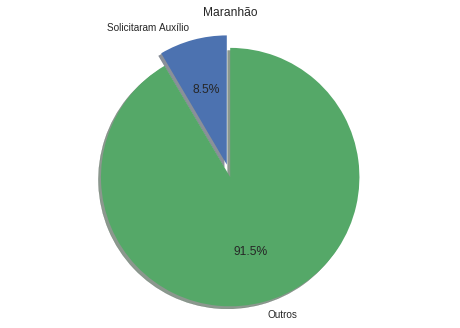

In [181]:

labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_ma, 100 - per_ma]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Maranhão")

plt.show()

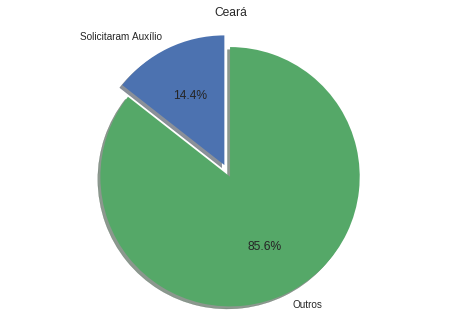

In [182]:

labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_ce, 100 - per_ce]
explode = (0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Ceará")

plt.show()

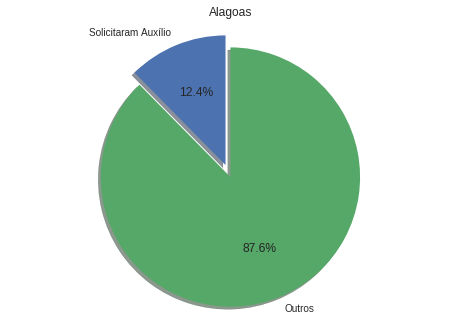

In [183]:

labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_al, 100 - per_al]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Alagoas")

plt.show()

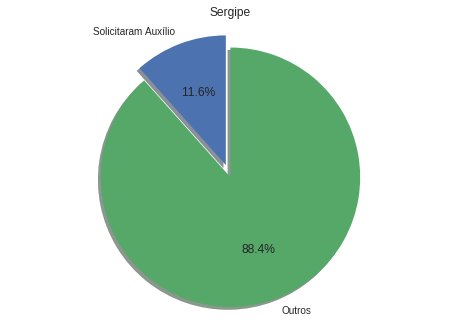

In [184]:

labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_se, 100 - per_se]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Sergipe")

plt.show()

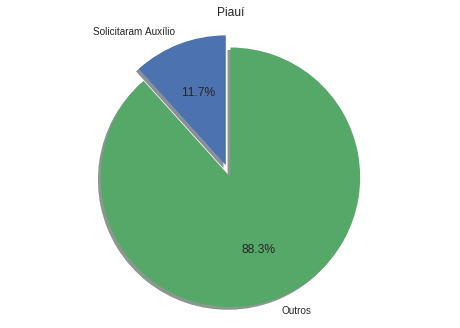

In [185]:

labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_pi, 100 - per_pi]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title("Piauí")

plt.show()

# Gráfico de Barra

In [186]:
ne = data[(data['UF_PROVA'] == 'RN') | (data['UF_PROVA'] == 'PB') | (data['UF_PROVA'] == 'PE') | (data['UF_PROVA'] == 'BA') | 
         (data['UF_PROVA'] == 'MA') | (data['UF_PROVA'] == 'CE') | (data['UF_PROVA'] == 'AL') | (data['UF_PROVA'] == 'SE') |
         (data['UF_PROVA'] == 'PI')]
len(ne)

81961

In [0]:
defi_ne = data[((data['UF_PROVA'] == 'RN') | (data['UF_PROVA'] == 'PB') | (data['UF_PROVA'] == 'PE') | (data['UF_PROVA'] == 'BA') | 
(data['UF_PROVA'] == 'MA') | (data['UF_PROVA'] == 'CE') | (data['UF_PROVA'] == 'AL') | (data['UF_PROVA'] == 'SE') | (data['UF_PROVA'] == 'PI')) & 
((data['IN_BAIXA_VISAO'] == 1) |
(data['IN_CEGUEIRA'] == 1) |
(data['IN_SURDEZ'] == 1) |
(data['IN_DEFICIENCIA_AUDITIVA'] == 1) |
(data['IN_SURDO_CEGUEIRA'] == 1) |
(data['IN_DEFICIENCIA_FISICA'] == 1) |
(data['IN_DEFICIENCIA_MENTAL'] == 1) |
(data['IN_DEFICIT_ATENCAO'] == 1) |
(data['IN_DISLEXIA'] == 1) |
(data['IN_GESTANTE'] == 1) |
(data['IN_LACTANTE'] == 1) |
(data['IN_IDOSO'] == 1) |
(data['IN_AUTISMO'] == 1) | 
(data['IN_SABATISTA'] == 1) |
(data['IN_BRAILLE'] == 1) |
(data['IN_AMPLIADA_24'] == 1) |
(data['IN_AMPLIADA_18'] == 1) |
(data['IN_LEDOR'] == 1) |
(data['IN_ACESSO'] == 1) |
(data['IN_TRANSCRICAO'] == 1) |
(data['IN_LIBRAS'] == 1) |
(data['IN_LEITURA_LABIAL'] == 1) |
(data['IN_MESA_CADEIRA_RODAS'] == 1) |
(data['IN_MESA_CADEIRA_SEPARADA'] == 1) |
(data['IN_APOIO_PERNA'] == 1) |
(data['IN_GUIA_INTERPRETE'] == 1) |
(data['IN_CERTIFICADO'] == 1))]

In [188]:
per_ne = len(defi_ne)/len(ne)*100
per_ne

11.223630751210942

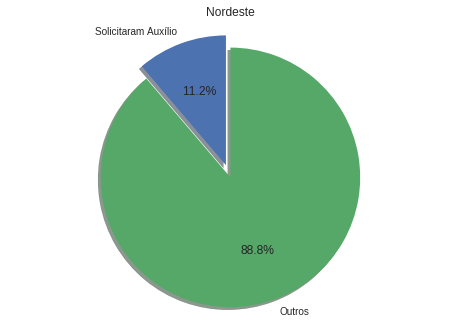

In [189]:
labels = 'Solicitaram Auxílio', 'Outros'
sizes = [per_ne, 100 - per_ne]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Nordeste")

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Quantidade de Pessoas que Solicitaram Auxílio no NE (Amostra de 250.000)')

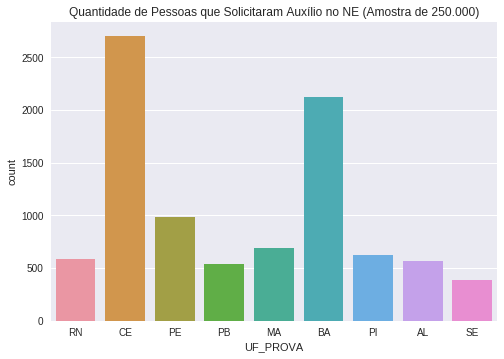

In [198]:
sns.set(style="darkgrid")
ax = sns.countplot(x="UF_PROVA", data=defi_ne)
ax.set_title("Quantidade de Pessoas que Solicitaram Auxílio no NE (Amostra de 250.000)")

In [0]:
jaconcluiu = data[data['ST_CONCLUSAO'] == 1]
estouC2016= data[data['ST_CONCLUSAO'] == 2]
estouA2016 = data[data['ST_CONCLUSAO'] == 3]
na = data[data['ST_CONCLUSAO'] == 4]

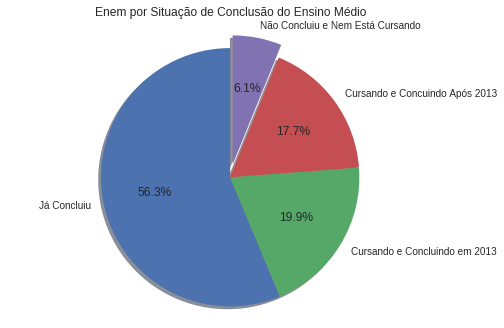

In [192]:
import matplotlib.pyplot as plt


labels = 'Já Concluiu', 'Cursando e Concluindo em 2013', 'Cursando e Concuindo Após 2013', 'Não Concluiu e Nem Está Cursando'
sizes = [len(jaconcluiu)/len(data), len(estouC2016)/len(data), len(estouA2016)/len(data), len(na)/len(data)]
explode = (0, 0, 0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Enem por Situação de Conclusão do Ensino Médio")

plt.show()

In [0]:
publica = data[data['TP_ESCOLA'] == 1]
privada = data[data['TP_ESCOLA'] == 2]

In [215]:
escola = data[(data['TP_ESCOLA'] == 1) | (data['TP_ESCOLA'] == 2)]
len(escola)

49826

In [216]:
per_pub = len(publica)/len(escola)*100
per_pub

82.67972544454703

In [217]:
per_priv = len(privada)/len(escola)*100
per_priv

17.32027455545298

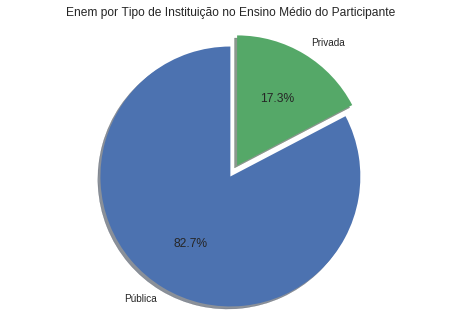

In [219]:
labels = 'Pública', 'Privada'
sizes = [per_pub, per_priv]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Enem por Tipo de Instituição no Ensino Médio do Participante")

plt.show()

In [0]:
nordeste = data[(data['UF_PROVA'] == 'RN') | (data['UF_PROVA'] == 'PB') | (data['UF_PROVA'] == 'PE') | (data['UF_PROVA'] == 'BA') | 
         (data['UF_PROVA'] == 'MA') | (data['UF_PROVA'] == 'CE') | (data['UF_PROVA'] == 'AL') | (data['UF_PROVA'] == 'SE') |
         (data['UF_PROVA'] == 'PI')]

norte = data[(data['UF_PROVA'] == 'AM') | (data['UF_PROVA'] == 'RR') | (data['UF_PROVA'] == 'AP') | (data['UF_PROVA'] == 'PA') |
            (data['UF_PROVA'] == 'TO') | (data['UF_PROVA'] == 'RO') | (data['UF_PROVA'] == 'AC')]

centro = data[(data['UF_PROVA'] == 'GO') | (data['UF_PROVA'] == 'MT') | (data['UF_PROVA'] == 'MS') | (data['UF_PROVA'] == 'DF')]

sul = data[(data['UF_PROVA'] == 'PR') | (data['UF_PROVA'] == 'SC') | (data['UF_PROVA'] == 'RS')]

sudeste = data[(data['UF_PROVA'] == 'SP') | (data['UF_PROVA'] == 'RJ') | (data['UF_PROVA'] == 'MG') | (data['UF_PROVA'] == 'ES')]

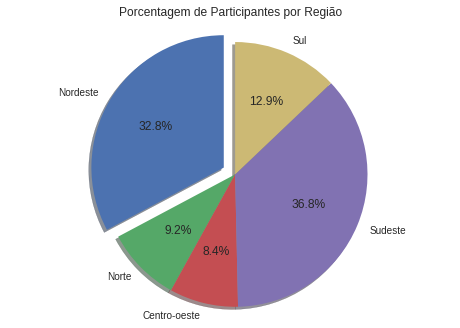

In [224]:
labels = 'Nordeste', 'Norte', 'Centro-oeste', 'Sudeste', 'Sul'
sizes = [len(nordeste)/len(data), len(norte)/len(data), len(centro)/len(data), len(sudeste)/len(data), len(sul)/len(data)]
explode = (0.1, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Porcentagem de Participantes por Região")

plt.show()